# Final Exam Review - Solutions

This review only covers material that we covered after Midterm 2. Be sure to review material from these units as well because the final exam is cumulative.

In this review we would like to build a classifier model that will be effective at predicting whether a baby born that is born in North Carolina will be born 'full term' or 'premature' given various information about the pregnancy.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as lm

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from scipy.stats import chi2


Bad key "text.kerning_factor" on line 4 in
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Read the ncbirths dataframe and clean it (if needed).

In [2]:
df=pd.read_csv('ncbirths.csv')
df.head()

,mother_age,premie,visits,marital,gained,weight,sex,habit
0,13,full term,10,not married,38,7.63,male,nonsmoker
1,14,full term,15,not married,20,7.88,male,nonsmoker
2,15,full term,11,not married,38,6.63,female,nonsmoker
3,15,full term,6,not married,34,8.00,male,nonsmoker
4,15,full term,9,not married,27,6.38,female,nonsmoker


In [3]:
df.shape

(994, 8)

## Let's first look for unexpected values in each of the columns.

In [4]:
for col in df.columns:
    print(col)
    print(df[col].unique())

mother_age
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 45 46 50]
premie
['full term' 'premie' 'missing']
visits
['10' '15' '11' '6' '9' '19' '12' '5' '13' '8' '4' '7' '17' '3' '16'
 'missing' '14' '0' '18' '2' '23' '30' '20' '22' '24' '25' '26']
marital
['not married' 'married']
gained
['38' '20' '34' '27' '22' '76' '15' 'missing' '52' '28' '12' '30' '75'
 '35' '9' '39' '40' '36' '50' '68' '72' '25' '10' '1' '11' '41' '48' '57'
 '60' '18' '23' '26' '32' '56' '13' '47' '17' '33' '4' '16' '0' '46' '51'
 '55' '37' '5' '24' '19' '29' '70' '14' '31' '45' '21' '6' '2' '62' '58'
 '65' '80' '85' '54' '8' '53' '44' '43' '61' '3' '42' '59' '7' '77']
weight
[ 7.63  7.88  6.63  8.    6.38  5.38  8.44  4.69  8.81  6.94  7.44  6.
  7.13  7.56  6.88  5.81  1.5   8.25  6.19  7.    7.19  9.5   5.56  7.5
  6.06  4.56  2.63  7.25  1.56  6.5   7.31  7.75  8.31  5.5   7.81  9.06
  6.56  5.88  8.75  7.06  5.94  8.56  8.06  4.44  4.75  1.69  9.25  7.69
  8.19  

#### Looks like the text 'missing' indicates that a given value is missing.

In [5]:
df=pd.read_csv('ncbirths.csv', na_values=['missing'])
df.head()

,mother_age,premie,visits,marital,gained,weight,sex,habit
0,13,full term,10.0,not married,38.0,7.63,male,nonsmoker
1,14,full term,15.0,not married,20.0,7.88,male,nonsmoker
2,15,full term,11.0,not married,38.0,6.63,female,nonsmoker
3,15,full term,6.0,not married,34.0,8.00,male,nonsmoker
4,15,full term,9.0,not married,27.0,6.38,female,nonsmoker


In [6]:
for col in df.dropna().columns:
    print(col)
    print(df[col].unique())

mother_age
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 45 46 50]
premie
['full term' 'premie' nan]
visits
[10. 15. 11.  6.  9. 19. 12.  5. 13.  8.  4.  7. 17.  3. 16. nan 14.  0.
 18.  2. 23. 30. 20. 22. 24. 25. 26.]
marital
['not married' 'married']
gained
[38. 20. 34. 27. 22. 76. 15. nan 52. 28. 12. 30. 75. 35.  9. 39. 40. 36.
 50. 68. 72. 25. 10.  1. 11. 41. 48. 57. 60. 18. 23. 26. 32. 56. 13. 47.
 17. 33.  4. 16.  0. 46. 51. 55. 37.  5. 24. 19. 29. 70. 14. 31. 45. 21.
  6.  2. 62. 58. 65. 80. 85. 54.  8. 53. 44. 43. 61.  3. 42. 59.  7. 77.]
weight
[ 7.63  7.88  6.63  8.    6.38  5.38  8.44  4.69  8.81  6.94  7.44  6.
  7.13  7.56  6.88  5.81  1.5   8.25  6.19  7.    7.19  9.5   5.56  7.5
  6.06  4.56  2.63  7.25  1.56  6.5   7.31  7.75  8.31  5.5   7.81  9.06
  6.56  5.88  8.75  7.06  5.94  8.56  8.06  4.44  4.75  1.69  9.25  7.69
  8.19  6.75  6.25  8.38  7.94  2.88  1.38  6.31  5.25  9.94  5.63  9.56
  5.44  6.69  8.13  5.75  9.    

## Now, let's drop missing values.

In [7]:
df=df.dropna()
df.head()

,mother_age,premie,visits,marital,gained,weight,sex,habit
0,13,full term,10.0,not married,38.0,7.63,male,nonsmoker
1,14,full term,15.0,not married,20.0,7.88,male,nonsmoker
2,15,full term,11.0,not married,38.0,6.63,female,nonsmoker
3,15,full term,6.0,not married,34.0,8.00,male,nonsmoker
4,15,full term,9.0,not married,27.0,6.38,female,nonsmoker


In [8]:
df.shape

(964, 8)

#### 30 rows were dropped in df.

C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


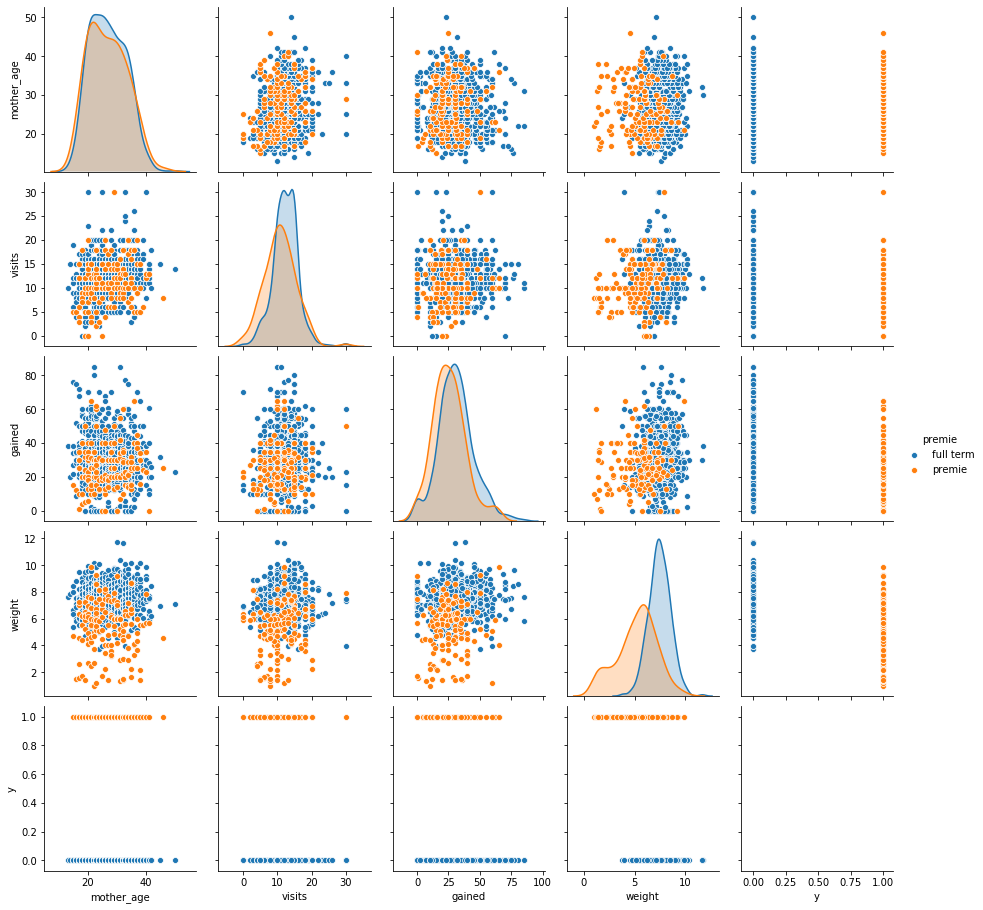

In [78]:
sns.pairplot(df, hue='premie')
plt.show()

In [72]:
temp=pd.crosstab(df['sex'], df['premie'], normalize='index')
temp

premie,full term,premie
sex,,
female,0.861284,0.138716
male,0.841996,0.158004


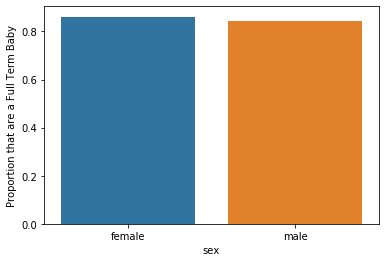

In [76]:
sns.barplot(x=temp.index, y="full term", data=temp)
plt.ylabel("Proportion that are a Full Term Baby")
plt.show()

## Transforming the Original Data for Non-Regularized Logistic Regression

Remember that the response variable for logistic regression needs to be turned into 0's and 1's. Let's let premie=1 and full term =0. 

In [10]:
df['y']=df['premie'].map({'premie':1,'full term':0})
df.head()

,mother_age,premie,visits,marital,gained,weight,sex,habit,y
0,13,full term,10.0,not married,38.0,7.63,male,nonsmoker,0
1,14,full term,15.0,not married,20.0,7.88,male,nonsmoker,0
2,15,full term,11.0,not married,38.0,6.63,female,nonsmoker,0
3,15,full term,6.0,not married,34.0,8.00,male,nonsmoker,0
4,15,full term,9.0,not married,27.0,6.38,female,nonsmoker,0


# INFERENCE-BASED NON-REGULARIZED REGRESSION 
First, we would like to train a non-regularized logistic regression model that will allow us to conduct inference. Thus we need to use/create the inputs that will work with the **statsmodels.formula.api** package functions.

## Create a training dataset (dataframe) and a test dataset (dataframe) with df with the following specifications:
* the test dataset is 20% of the df rows that have been randomly selected.
* the random state is 100.

In [11]:
dat_train, dat_test = \
train_test_split(df, test_size=0.20, random_state=100)
dat_train.head()

,mother_age,premie,visits,marital,gained,weight,sex,habit,y
944,37,full term,10.0,married,10.0,7.00,female,nonsmoker,0
857,34,full term,14.0,married,40.0,7.88,female,nonsmoker,0
375,24,full term,12.0,married,28.0,7.25,male,nonsmoker,0
198,21,full term,8.0,not married,32.0,8.06,male,nonsmoker,0
816,33,full term,16.0,married,30.0,6.81,male,nonsmoker,0


In [12]:
dat_test

,mother_age,premie,visits,marital,gained,weight,sex,habit,y
712,31,full term,12.0,married,50.0,7.13,male,nonsmoker,0
481,26,full term,15.0,married,36.0,7.69,male,nonsmoker,0
227,22,full term,10.0,not married,50.0,7.25,female,nonsmoker,0
878,35,full term,16.0,married,32.0,7.31,female,nonsmoker,0
603,29,full term,11.0,married,30.0,9.81,female,nonsmoker,0
...,...,...,...,...,...,...,...,...,...
107,19,premie,12.0,not married,50.0,5.25,female,nonsmoker,1
502,27,full term,12.0,married,31.0,6.56,female,nonsmoker,0
209,21,full term,14.0,married,0.0,7.69,male,nonsmoker,0
904,36,full term,4.0,married,13.0,7.56,female,nonsmoker,0


## Full Logistic Regression Model
Let's predict y initially using the following explanatory variables:
* mother_age
* visits
* martital
* gained
* habit
* weight
* sex

### Fit the logistic regression model with the training data and print the summary output.

In [13]:
fullmod = smf.logit('y ~ mother_age+ visits+ marital+ gained+habit+weight +sex', data=dat_train).fit()
fullmod.summary()

Optimization terminated successfully.
         Current function value: 0.275386
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  771
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            7
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.3532
Time:                        17:05:51   Log-Likelihood:                -212.32
converged:                       True   LL-Null:                       -328.24
Covariance Type:            nonrobust   LLR p-value:                 2.020e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.0813      1.083      5.617      0.000       3.959       8.203
marital[T.not married]     0.2201      0.292      0.753      0.451      -0.353       0.793
habit[T.smoker]           -0.2601      0.378     -0.688      0.492      -1.001       0.481
sex[T.male]                0.6403      0.259      2.476      0.013       0.133       1.147
mother_age                 0.0240      0.022      1.069      0.285      -0.020       0.068
visits                    -0.0601      0.032     -1.867      0.062      -0.123       0.003
gained                    -0.0154      0.010     -1.592      0.111      -0.034       0.004
weight                    -1.1720      0.112    -10.438      0.000      -1.392      -0.952
==========================================================================================
"""

### Plot the ROC for this full model and calculate the AUC using the test data.

First we calculate test dataset predictive probabilities.

In [14]:
phat = fullmod.predict(exog=dat_test)
phat

712    0.084418
481    0.042100
227    0.045648
878    0.043006
603    0.002886
         ...   
107    0.291491
502    0.103470
209    0.067242
904    0.086490
11     0.009513
Length: 193, dtype: float64

Then we calculate a series of thresholds and the false positive rates and true positive rates that correspond to them (for the test data).

In [15]:
fprs, tprs, thresholds = roc_curve(y_true=dat_test['y'], 
                            y_score=phat)
auc = roc_auc_score(y_true=dat_test['y'], 
                    y_score=phat)
print('False Positive Rates')
print(fprs)
print('True Positive Rates')
print(tprs)


False Positive Rates
[0.         0.         0.         0.01197605 0.01197605 0.01796407
 0.01796407 0.06586826 0.06586826 0.09580838 0.09580838 0.1257485
 0.1257485  0.15568862 0.15568862 0.23353293 0.23353293 0.26946108
 0.26946108 0.37125749 0.37125749 0.40718563 0.40718563 0.41916168
 0.41916168 0.68862275 0.68862275 1.        ]
True Positive Rates
[0.         0.03846154 0.26923077 0.26923077 0.38461538 0.38461538
 0.53846154 0.53846154 0.61538462 0.61538462 0.65384615 0.65384615
 0.69230769 0.69230769 0.73076923 0.73076923 0.76923077 0.76923077
 0.80769231 0.80769231 0.88461538 0.88461538 0.92307692 0.92307692
 0.96153846 0.96153846 1.         1.        ]


In [16]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

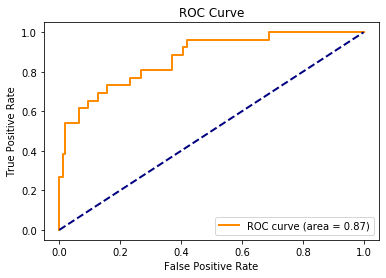

In [17]:
plot_roc(fprs, tprs, auc)

It looks like the true positive rate seems to level out around a false positive rate of about 0.4. So let's FIND the predictive probability threshold that corresponds to this combination, of a $fpr\approx 0.4$ and a $tpr\approx 0.88$.

### Use this ROC to come up with a good predictive probability threshold. Explain why you chose this one.

In [18]:
def tpr_fpr_thresh(y, score, thresh):
    yhat = 1*(score >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [19]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(dat_test['y'], phat, thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.898204
   threshold  tpr       fpr
0       0.02  1.0  0.730539
   threshold       tpr       fpr
0       0.03  0.961538  0.652695
   threshold       tpr       fpr
0       0.04  0.961538  0.580838
   threshold       tpr      fpr
0       0.05  0.961538  0.48503
   threshold       tpr       fpr
0       0.06  0.961538  0.437126
   threshold       tpr       fpr
0       0.07  0.884615  0.407186
   threshold       tpr       fpr
0       0.08  0.846154  0.371257
   threshold       tpr       fpr
0       0.09  0.807692  0.335329
   threshold       tpr       fpr
0        0.1  0.807692  0.305389
   threshold       tpr       fpr
0       0.11  0.807692  0.281437
   threshold       tpr       fpr
0       0.12  0.769231  0.257485
   threshold       tpr       fpr
0       0.13  0.769231  0.245509
   threshold       tpr       fpr
0       0.14  0.730769  0.203593
   threshold       tpr       fpr
0       0.15  0.730

#### It looks like the predictive probability threshold of $p_0=0.07$ gives us a fpr=0.407186 and a tpr=0.8846.

### Using, this threshold, display just the true positives in your test dataset.

In [20]:
dat_test['prediction']=1*(phat>=0.07)
dat_test.head()

C:\Users\vme3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mother_age,premie,visits,marital,gained,weight,sex,habit,y,prediction
712,31,full term,12.0,married,50.0,7.13,male,nonsmoker,0,1
481,26,full term,15.0,married,36.0,7.69,male,nonsmoker,0,0
227,22,full term,10.0,not married,50.0,7.25,female,nonsmoker,0,0
878,35,full term,16.0,married,32.0,7.31,female,nonsmoker,0,0
603,29,full term,11.0,married,30.0,9.81,female,nonsmoker,0,0


#### True Positives

In [21]:
dat_test[(dat_test['y']==1) & (dat_test['prediction']==1)]

,mother_age,premie,visits,marital,gained,weight,sex,habit,y,prediction
171,20,premie,13.0,not married,6.0,4.50,male,nonsmoker,1,1
679,30,premie,8.0,not married,30.0,7.25,female,nonsmoker,1,1
492,26,premie,10.0,married,13.0,3.44,male,nonsmoker,1,1
108,19,premie,10.0,married,35.0,7.25,male,nonsmoker,1,1
390,24,premie,7.0,not married,18.0,5.06,male,nonsmoker,1,1
226,21,premie,9.0,married,15.0,5.50,female,smoker,1,1
440,25,premie,8.0,not married,30.0,5.19,male,nonsmoker,1,1
172,20,premie,9.0,not married,18.0,4.94,female,nonsmoker,1,1
223,21,premie,3.0,not married,16.0,5.94,male,nonsmoker,1,1
776,32,premie,18.0,married,10.0,4.44,male,smoker,1,1


### Do the same thing for:
* the true negatives
* the false positives, and 
* the false negatives.

#### True negatives

In [22]:
dat_test[(dat_test['y']==0) & (dat_test['prediction']==0)]

,mother_age,premie,visits,marital,gained,weight,sex,habit,y,prediction
481,26,full term,15.0,married,36.0,7.69,male,nonsmoker,0,0
227,22,full term,10.0,not married,50.0,7.25,female,nonsmoker,0,0
878,35,full term,16.0,married,32.0,7.31,female,nonsmoker,0,0
603,29,full term,11.0,married,30.0,9.81,female,nonsmoker,0,0
661,30,full term,14.0,married,45.0,7.31,female,nonsmoker,0,0
...,...,...,...,...,...,...,...,...,...,...
511,27,full term,9.0,not married,40.0,9.06,male,nonsmoker,0,0
193,21,full term,13.0,married,40.0,7.88,female,nonsmoker,0,0
110,20,full term,14.0,married,25.0,9.94,male,nonsmoker,0,0
209,21,full term,14.0,married,0.0,7.69,male,nonsmoker,0,0


#### False positives

In [23]:
dat_test[(dat_test['y']==0) & (dat_test['prediction']==1)]

,mother_age,premie,visits,marital,gained,weight,sex,habit,y,prediction
712,31,full term,12.0,married,50.0,7.13,male,nonsmoker,0,1
121,20,full term,16.0,not married,35.0,7.19,male,nonsmoker,0,1
926,36,full term,5.0,not married,25.0,5.38,female,smoker,0,1
599,29,full term,9.0,not married,0.0,8.06,male,nonsmoker,0,1
124,20,full term,0.0,not married,70.0,5.94,female,nonsmoker,0,1
...,...,...,...,...,...,...,...,...,...,...
800,33,full term,14.0,married,0.0,7.81,male,nonsmoker,0,1
676,30,full term,15.0,married,44.0,6.38,male,smoker,0,1
536,27,full term,15.0,married,38.0,7.00,male,smoker,0,1
502,27,full term,12.0,married,31.0,6.56,female,nonsmoker,0,1


#### False negatives

In [24]:
dat_test[(dat_test['y']==1) & (dat_test['prediction']==0)]

,mother_age,premie,visits,marital,gained,weight,sex,habit,y,prediction
489,26,premie,18.0,married,40.0,8.00,male,nonsmoker,1,0
333,23,premie,18.0,married,20.0,6.69,female,nonsmoker,1,0
167,20,premie,20.0,married,35.0,6.94,male,nonsmoker,1,0


### Using this threshold, display the confusion matrix for the test data. Use this find the number of true positives, true negatives, false positives, and false negatives.

In [25]:
confusion_matrix(y_true=dat_test['y'], y_pred=dat_test['prediction'])
tn, fp, fn, tp = confusion_matrix(y_true=dat_test['y'], 
                                  y_pred=dat_test['prediction']).ravel()
(tn, fp, fn, tp)

(99, 68, 3, 23)

* True positives: 23
* True negatives: 99
* False positives: 68
* False negatives: 3

### Calculate the following for your test dataset with this threshold:
* sensitivity
* specificity
* true positive rate
* false positive rate

#### Specificity and True Negative Rate

In [26]:
specificity = tn /(tn+fp)
specificity

0.592814371257485

#### Sensitivity and True Positive Rate

In [27]:
sensitivity = tp /(tp+fn)
sensitivity

0.8846153846153846

#### False positive rate

In [28]:
fp / (fp + tn)

0.40718562874251496

## Reduced Logistic Regression Model

Fit a reduced logistic regression model with the training data that only includes the slopes from the full model that were statistically significant (at a significance level of $\alpha=0.10$).

### Print the output of this model.

In [29]:
redmod = smf.logit('y ~  visits+weight +sex', data=dat_train).fit()
redmod.summary()

Optimization terminated successfully.
         Current function value: 0.278557
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  771
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.3457
Time:                        17:05:53   Log-Likelihood:                -214.77
converged:                       True   LL-Null:                       -328.24
Covariance Type:            nonrobust   LLR p-value:                 6.321e-49
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.3861      0.792      8.058      0.000       4.833       7.939
sex[T.male]     0.6258      0.257      2.434      0.015       0.122       1.130
visits         -0.0613      0.031     -2.008      0.045      -0.121      -0.001
weight         -1.1742      0.111    -10.592      0.000      -1.391      -0.957
===============================================================================
"""

## Comparing the Full Model to the Reduced Model.

### Way 1: Compare the ROC curves and the AUC of the two models (for the test data). Discuss which one is best using these metrics. What does a better performance with these metrics indicate about a model?

In [30]:
phat = redmod.predict(exog=dat_test)
phat

712    0.109519
481    0.050350
227    0.060669
878    0.040004
603    0.002998
         ...   
107    0.374268
502    0.113837
209    0.053363
904    0.060885
11     0.011557
Length: 193, dtype: float64

Then we calculate a series of thresholds and the false positive rates and true positive rates that correspond to them (for the test data).

In [58]:
fprs, tprs, thresholds = roc_curve(y_true=dat_test['y'], 
                            y_score=phat)
auc = roc_auc_score(y_true=dat_test['y'], 
                    y_score=phat)
print('False Positive Rates')
print(fprs)
print('True Positive Rates')
print(tprs)


False Positive Rates
[0.         0.         0.         0.00598802 0.00598802 0.01197605
 0.01197605 0.01796407 0.01796407 0.0239521  0.0239521  0.02994012
 0.02994012 0.03592814 0.03592814 0.04790419 0.04790419 0.11377246
 0.11377246 0.13173653 0.13173653 0.14371257 0.1497006  0.1497006
 0.15568862 0.15568862 0.23353293 0.24550898 0.28742515 0.28742515
 0.2994012  0.2994012  0.32335329 0.32335329 0.38323353 0.38323353
 0.4011976  0.4011976  0.40718563 0.41916168 0.50898204 0.52095808
 0.5508982  0.56287425 0.64670659 0.65868263 0.66467066 0.66467066
 0.69461078 0.70658683 0.74850299 0.76047904 0.78443114 0.79640719
 0.8502994  0.86227545 0.92814371 0.94011976 1.        ]
True Positive Rates
[0.         0.03846154 0.11538462 0.11538462 0.23076923 0.23076923
 0.42307692 0.42307692 0.46153846 0.46153846 0.5        0.5
 0.53846154 0.53846154 0.57692308 0.57692308 0.61538462 0.61538462
 0.65384615 0.65384615 0.69230769 0.69230769 0.69230769 0.73076923
 0.73076923 0.76923077 0.76923077 0.769

In [32]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

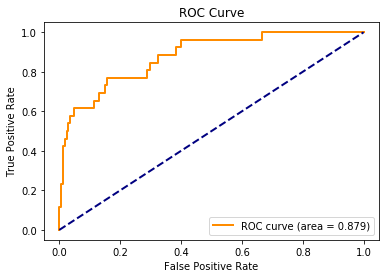

In [33]:
plot_roc(fprs, tprs, auc)

The AUc of the reduced model is slightly better (0.879) than the the AUC of the full model (0.87). This indicates that the reduced model has a predictive probability threshold that gets slightly closer to the the ideal one (of fpr=0 and tpr=1).

### Way 2: Compare the AIC and BIC scores of the full and reduced model. Discuss which one is best using these metrics. What does better performance with one of these metrics indicate about the model?

In [34]:
print('AIC of Full Model', fullmod.aic)
print('AIC of Reduced Model', redmod.aic)

AIC of Full Model 440.64538347323753
AIC of Reduced Model 437.53497946960726


In [35]:
print('BIC of Full Model', fullmod.bic)
print('BIC of Reduced Model', redmod.bic)

BIC of Full Model 477.82689046174414
BIC of Reduced Model 456.12573296386057


The AIC and the BIC scores of the reduced model are both lower than the AIC and BIC scores of the full model. Therefore, using these metrics, the reduced model is better. Having a lower AIC and BIC indicates that a model is more parsimonious. In otherwords, it strikes more of a balance of being a good fit of the data, but not having so many slopes such that it is likely to overfit the data (and therefore not be as reliable for predicting new data).

### Way 3: Compare the full and reduced model using the likelihood ratio test. Make sure you correctly set up your hypotheses and correctly interpret your conclusion about these hypotheses.

$H_0:$ The reduced model is correct.

$H_A:$ The reduced model is incorrect because at least one missing coefficient from the full model is not zero.

#### Test statistic

In [36]:
llr=-2*(redmod.llf-fullmod.llf)
llr

4.889595996369735

#### Degrees of freedom = 4 = (7 slopes in the full model - 3 slopes in the reduced model)

In [37]:
dfdiff=4

#### p-value

In [38]:
pval=1 - chi2.cdf(llr, df=dfdiff)
pval

0.29881437084898343

#### Conclusion

Because p-value=.2988$\geq \alpha=0.05$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the reduced model is incorrect for the reason of there being least one missing coefficient from the full model is not zero.

## Overall: All three of these methods conclude that the reduced model is better than the full model.

